# Fake News Classifier - TFIDF

#### Data set downloaded :- https://www.kaggle.com/competitions/fake-news/data 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("fake-news/train.csv")

In [3]:
df.head(20)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


In [4]:
df.shape

(20800, 5)

In [5]:
# Get independent features
X = df.drop(['label'],axis='columns')

In [6]:
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [7]:
y = df['label']

In [8]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [9]:
X.shape, y.shape

((20800, 4), (20800,))

### Data cleaning and perprocessing

In [10]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,HashingVectorizer

In [11]:
## Remove the Null or NA values
df = df.dropna()

In [12]:
df.shape

(18285, 5)

##### Here After the remove the Null value by (dropna()) we got new data shape in our data.

In [13]:
messages = df.copy() 

In [14]:
messages.reset_index(inplace=True)

In [15]:
messages.head(20)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


##### Observation :-
1. We did the reset_index because we lost 6 row data by applying dropna().
2. for this we might get error while doing some iteration operation for 'index' or 'id' column in future. So we will not consider those two columns.
2. Here we will go for 'text' column instead of 'title' as we will get more information. 

In [16]:
messages['title'][6]

'Benoît Hamon Wins French Socialist Party’s Presidential Nomination - The New York Times'

In [17]:
messages['text'][6]

'PARIS  —   France chose an idealistic, traditional   candidate in Sunday’s primary to represent the Socialist and   parties in the presidential election this spring. The candidate, Benoît Hamon, 49, who ran on the slogan that he would “make France’s heart beat,” bested Manuel Valls, the former prime minister, whose campaign has promoted more   policies and who has a strong    background. Mr. Hamon appeared to have won by a wide margin, with incomplete returns showing him with an estimated 58 percent of the vote to Mr. Valls’s 41 percent. “Tonight the left holds its head up high again it is looking to the future,” Mr. Hamon said, addressing his supporters. “Our country needs the left, but a modern, innovative left,” he said. Mr. Hamon’s victory was the clearest sign yet that voters on the left want a break with the policies of President François Hollande, who in December announced that he would not seek  . However, Mr. Hamon’s strong showing is unlikely to change widespread assessments

#### Here we will apply the Tokenizer,Stopword,Stemming for clear corpus data for train a model

In [18]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

In [19]:
corpus = []
ps = PorterStemmer()
reg_ex = '[^a-zA-Z]'

In [20]:
for i in range(len(messages)):
    review = re.sub(reg_ex,' ',messages['text'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [21]:
corpus[6]

'pari franc chose idealist tradit candid sunday primari repres socialist parti presidenti elect spring candid beno hamon ran slogan would make franc heart beat best manuel vall former prime minist whose campaign promot polici strong background mr hamon appear wide margin incomplet return show estim percent vote mr vall percent tonight left hold head high look futur mr hamon said address support countri need left modern innov left said mr hamon victori clearest sign yet voter left want break polici presid fran oi holland decemb announc would seek howev mr hamon strong show unlik chang widespread assess candid littl chanc make second round vote gener elect first round gener elect set april runoff may socialist parti deepli divid one measur lack popular enthusiasm rel low number peopl vote two million peopl vote second round primari sunday contrast million second round last presidenti primari left howev much convent wisdom elect go thrown question past week lead candid fran oi fillon repr

### TF-IDF Vectorizer

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [24]:
X.shape

(18285, 5000)

In [25]:
y=messages['label']

### Divide the dataset into Train and Test

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [30]:
tfidf_v.get_feature_names_out()[:30]

array(['aaron', 'abandon', 'abc', 'abe', 'abedin', 'abil', 'abl', 'abort',
       'abroad', 'absenc', 'absolut', 'absorb', 'absurd', 'abu', 'abus',
       'academ', 'academi', 'acceler', 'accept', 'access',
       'access pipelin', 'accid', 'accommod', 'accompani', 'accomplish',
       'accord', 'accord report', 'account', 'accumul', 'accur'],
      dtype=object)

In [31]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [32]:
count_df = pd.DataFrame(X_train, columns=tfidf_v.get_feature_names())

In [33]:
count_df.head()

,aaron,abandon,abc,abe,abedin,abil,abl,abort,abroad,absenc,...,young,young peopl,younger,youth,youtub,zero,zika,zionist,zone,zu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### EDA - Ploting the graph

In [34]:
import matplotlib.pyplot as plt

In [35]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### MultinomialNB Algorithm

In [36]:

from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [37]:
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.900
Confusion matrix, without normalization


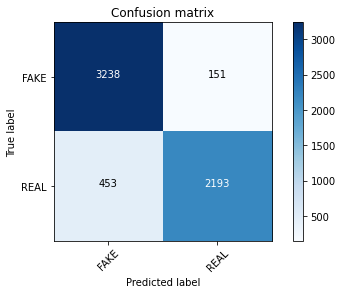

In [38]:

classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [39]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.899917149958575

In [40]:
y_train.shape

(12250,)

### Passive Aggressive Classifier Algorithm

In [41]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [43]:
linear_clf = PassiveAggressiveClassifier(max_iter=50)

accuracy:   0.951
Confusion matrix, without normalization


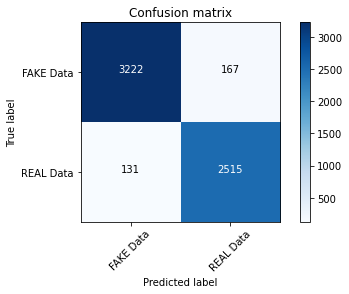

In [44]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

### Multinomial Classifier with Hyperparameter

In [57]:
classifier=MultinomialNB(alpha=0.1)

In [58]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

c:\Users\nikhi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


Alpha: 0.0, Score : 0.9022369511184756
Alpha: 0.1, Score : 0.9017398508699255
Alpha: 0.2, Score : 0.9020712510356255
Alpha: 0.30000000000000004, Score : 0.9022369511184756
Alpha: 0.4, Score : 0.9020712510356255
Alpha: 0.5, Score : 0.9014084507042254
Alpha: 0.6000000000000001, Score : 0.9015741507870754
Alpha: 0.7000000000000001, Score : 0.9012427506213753
Alpha: 0.8, Score : 0.9009113504556753
Alpha: 0.9, Score : 0.9005799502899752


In [59]:
## Get Features names
feature_names = tfidf_v.get_feature_names_out()

In [60]:
feature_names

array(['aaron', 'abandon', 'abc', ..., 'zionist', 'zone', 'zu'],
      dtype=object)

In [61]:
classifier.coef_[0]

AttributeError: 'MultinomialNB' object has no attribute 'coef_'

In [62]:
### Most real
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

AttributeError: 'MultinomialNB' object has no attribute 'coef_'

In [ ]:
### Most fake
sorted(zip(classifier.coef_[0], feature_names))[:5000]

## HashingVectorizer


In [73]:
hs_vectorizer=HashingVectorizer(n_features=5000,alternate_sign=False)
X=hs_vectorizer.fit_transform(corpus).toarray()

In [74]:
X.shape

(18285, 5000)

In [75]:
X

array([[0.        , 0.15922347, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.03785056, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.02285155, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.06880662, 0.        , ..., 0.        , 0.        ,
        0.        ]])

### Divide the dataset into Train and Test

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

accuracy:   0.876
Confusion matrix, without normalization


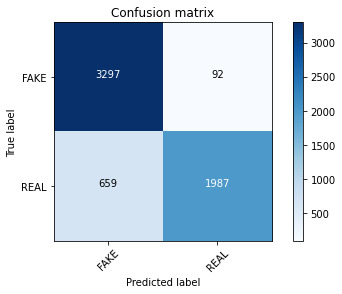

In [77]:

from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])